In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import math
import re
from pandas.core.frame import DataFrame
from sklearn.neighbors import LocalOutlierFactor

### Data Loader

In [117]:
item_cat=pd.read_csv("../datasets/item_categories.csv")
item=pd.read_csv("../datasets/items.csv")
sub=pd.read_csv("../datasets/sample_submission.csv")
shops=pd.read_csv("../datasets/shops.csv")
test=pd.read_csv("../datasets/test.csv")
sales=pd.read_csv("../datasets/sales_train.csv")

In [118]:
# Initialize plot style
sns.set(style='darkgrid')

### Basic View

In [119]:
# Calculate first 100 sales and price
cnt_sort_index = sorted(range(len(sales['item_cnt_day'])), key=lambda k: sales['item_cnt_day'][k], reverse=True)[:100]
price_sort_index = sorted(range(len(sales['item_price'])), key=lambda k: sales['item_price'][k], reverse=True)[:100]

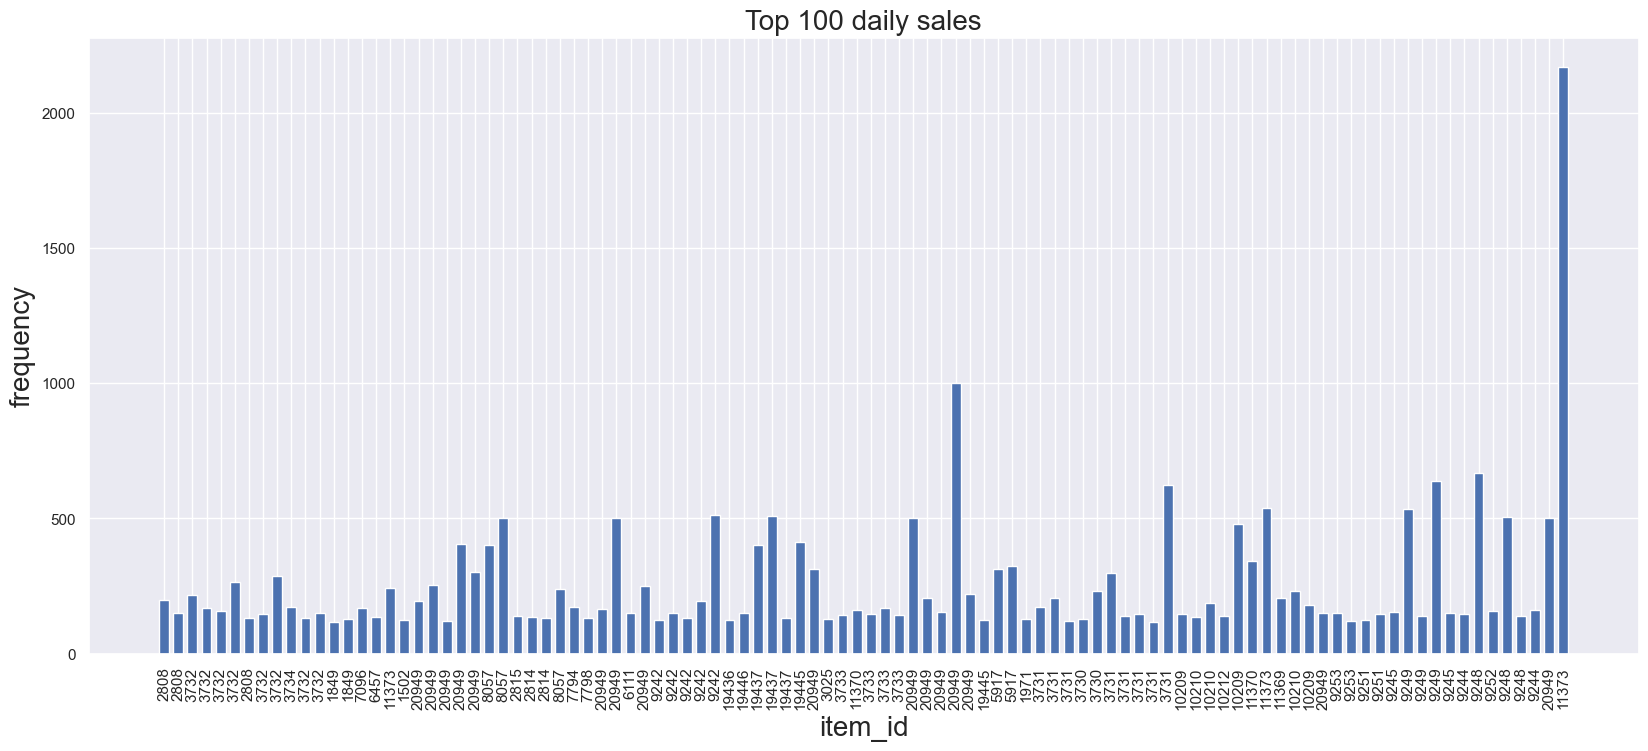

In [120]:
# Top 100 Daily Sales
cnt_sort = sales.loc[sorted(cnt_sort_index)]
plt.figure(figsize=(20, 8))
plt.xlabel('item_id', fontsize = 20)
plt.ylabel('frequency', fontsize = 20)
plt.title('Top 100 daily sales', fontsize = 20)
f_p = plt.gca()
f_p.bar(range(len(cnt_sort['item_cnt_day'])),cnt_sort['item_cnt_day'], width=0.7, color='b')
plt.xticks(range(len(cnt_sort['item_cnt_day'])), cnt_sort['item_id'], rotation=90)
plt.savefig('../fig/'+'Top_100_daily_sales.jpg')
plt.show()

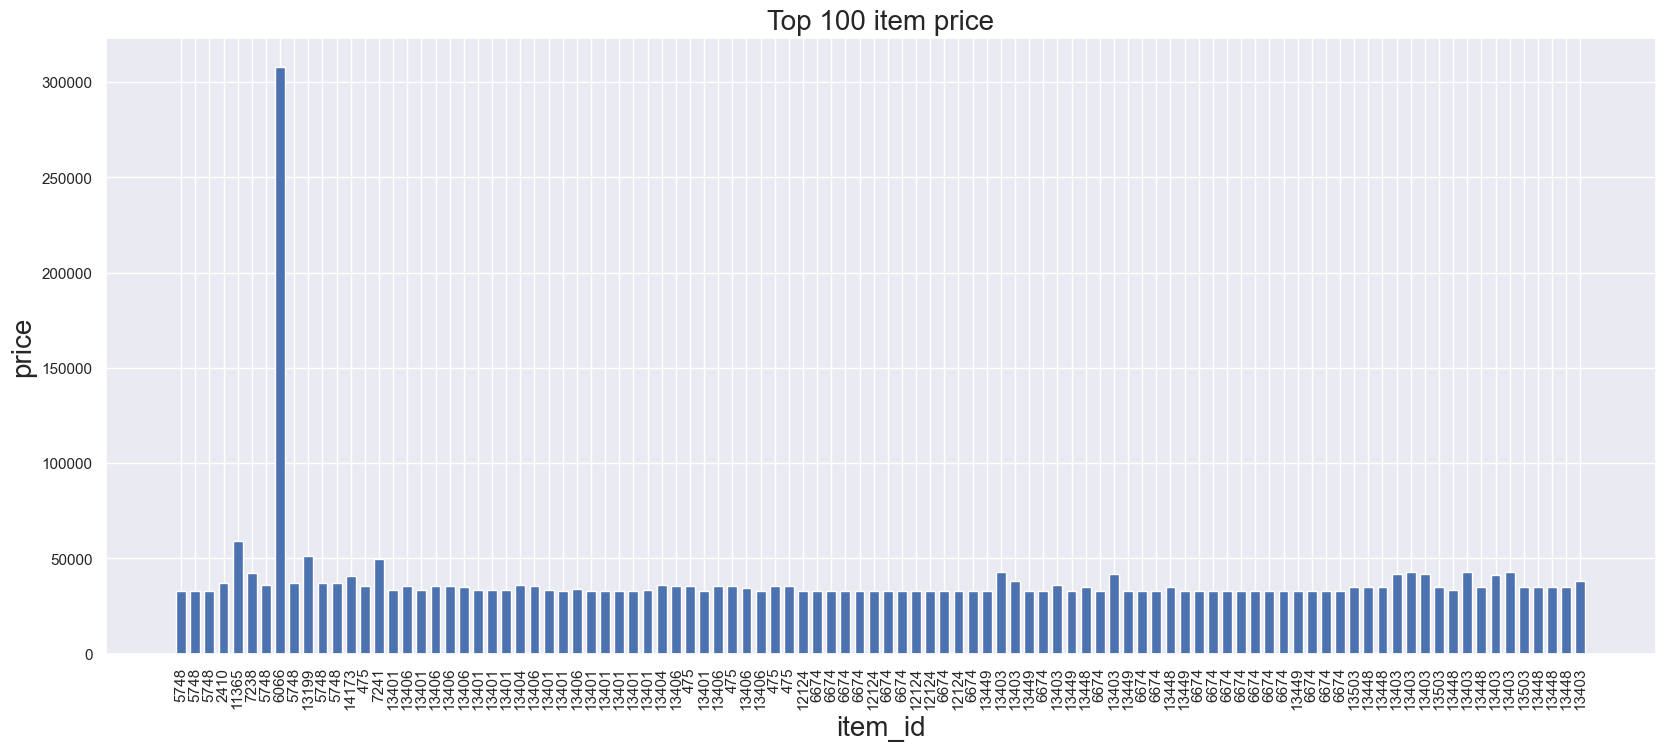

In [121]:
# Top 100 price
price_sort = sales.loc[sorted(price_sort_index)]
plt.figure(figsize=(20, 8))
plt.xlabel('item_id', fontsize = 20)
plt.ylabel('price', fontsize = 20)
plt.title('Top 100 item price', fontsize = 20)
f_p = plt.gca()
f_p.bar(range(len(price_sort['item_price'])),price_sort['item_price'], width=0.7, color='b')
plt.xticks(range(len(price_sort['item_price'])), price_sort['item_id'], rotation=90)
plt.savefig('../fig/'+'Top_100_item_price.jpg')
plt.show()

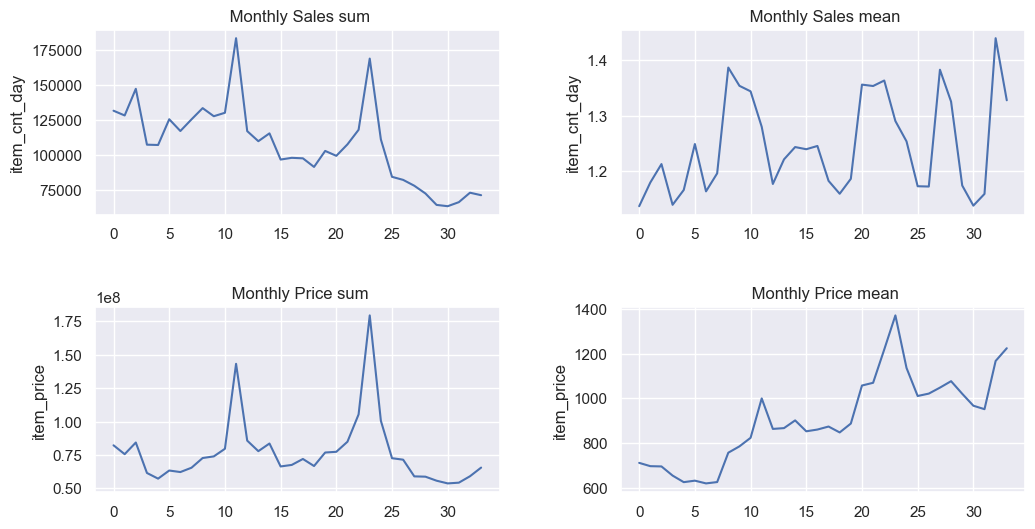

In [122]:
# sales trend
block_cnt_sum = sales.groupby(["date_block_num"])["item_cnt_day"].sum()
block_cnt_mean = sales.groupby(["date_block_num"])["item_cnt_day"].mean()
block_price_sum = sales.groupby(["date_block_num"])["item_price"].sum()
block_price_mean = sales.groupby(["date_block_num"])["item_price"].mean()
sns.set(style='darkgrid')
ax=[None for i in range(4)]
fig=plt.figure(figsize=(12,6),facecolor='white')
gs=fig.add_gridspec(2,2)
gs.update(wspace=0.3, hspace=0.5)
ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])
ax[2]=fig.add_subplot(gs[1,0])
ax[3]=fig.add_subplot(gs[1,1])
sns.lineplot(x=range(34), y=block_cnt_sum, ax=ax[0]).set_title(" Monthly Sales sum")
sns.lineplot(x=range(34), y=block_cnt_mean, ax=ax[1]).set_title(" Monthly Sales mean")
sns.lineplot(x=range(34), y=block_price_sum, ax=ax[2]).set_title(" Monthly Price sum")
sns.lineplot(x=range(34), y=block_price_mean, ax=ax[3]).set_title(" Monthly Price mean")
plt.savefig('../fig/'+'monthly_trend.jpg')
plt.show()

### Outliers

In [1]:
from sklearn.neighbors import LocalOutlierFactor

In [7]:
X = [[i] for i in sales.item_cnt_day]
clf = LocalOutlierFactor(n_neighbors=2)
clf.fit_predict(X)

In [ ]:
X_p = [[i] for i in sales.item_price]
clf_p = LocalOutlierFactor(n_neighbors=2)
clf_p.fit_predict(X)

date              28.10.2015
date_block_num            33
shop_id                   12
item_id                11373
item_price          0.908714
item_cnt_day          2169.0
Name: 2909818, dtype: object
                                  item_name  item_id  item_category_id
11373  Доставка до пункта выдачи (Boxberry)    11373                 9


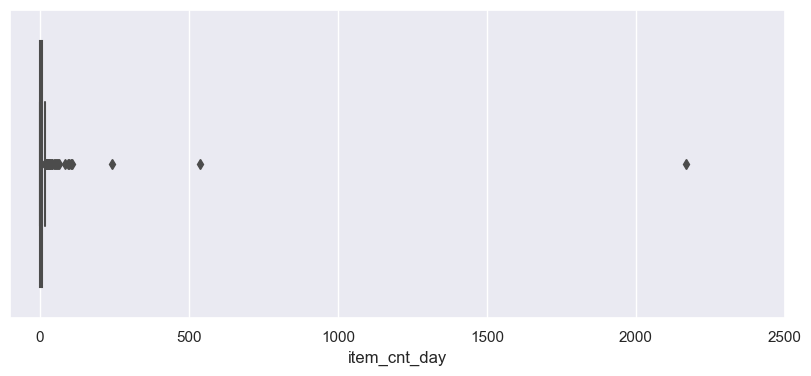

In [123]:
# First outlier's information
print(sales.loc[2909818])
print(item[item['item_id'] == 11373]) # item name (Delivery to the point of issue (Boxberry))
# All item 11373 sales
sort_item_11373 = sales[sales['item_id'] == 11373]['item_cnt_day']
plt.figure(figsize=(10,4))
plt.xlim(-100, 2500)
sns.boxplot(x=sort_item_11373)
plt.savefig('../fig/'+'item_outlier.jpg')

In [30]:
# Second outlier's information
print(sales.loc[1163158])
print(item[item['item_id'] == 6066]) # item name (Delivery to the point of issue (Boxberry))
# how many sales
sales[sales['item_id'] == 6066] # only sale once

date              13.12.2013
date_block_num            11
shop_id                   12
item_id                 6066
item_price          307980.0
item_cnt_day             1.0
Name: 1163158, dtype: object
                 item_name  item_id  item_category_id
6066  Radmin 3  - 522 лиц.     6066                75


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


### Missing Value

In [31]:
print(sales.isnull().any())
print(shops.isnull().any())
print(item.isnull().any())
print(item_cat.isnull().any())
print(sub.isnull().any())

date              False
date_block_num    False
shop_id           False
item_id           False
item_price        False
item_cnt_day      False
dtype: bool
shop_name    False
shop_id      False
dtype: bool
item_name           False
item_id             False
item_category_id    False
dtype: bool
item_category_name    False
item_category_id      False
dtype: bool
ID                False
item_cnt_month    False
dtype: bool


### Error Value

In [32]:
sales[sales["item_price"] < 0] # only one

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [33]:
sales[sales["item_cnt_day"] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,05.01.2013,0,25,2552,899.0,-1.0
148,23.01.2013,0,25,2321,999.0,-1.0
175,07.01.2013,0,25,2199,1449.0,-1.0
807,02.01.2013,0,25,2330,599.0,-1.0
1041,13.01.2013,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,26.10.2015,33,25,3917,449.0,-1.0
2934462,18.10.2015,33,25,4896,6398.0,-1.0
2935263,05.10.2015,33,25,10039,249.0,-1.0
2935643,16.10.2015,33,25,7893,2990.0,-1.0


### Difference item or shop between training and test set

In [34]:
def compare_df(df1, df2, names):
    print('Comparing ', names[2], 'on', names[0], ' and ', names[1])
    df1_list = list(df1[names[2]].drop_duplicates())
    df2_list = list(df2[names[2]].drop_duplicates())
    diff = [y for y in (df1_list + df2_list) if y not in df1_list] # Different
    print('Different:', diff)
    
    only_df1 = [x for x in df1_list if x not in df2_list]  
    only_df2 = [y for y in df2_list if y not in df1_list]  
    print(names[2], ' only occur in', names[0], only_df1)
    print(names[2], ' only occur in', names[1], only_df2)
    print('\n')
    return only_df1

In [36]:
diff = compare_df(sales, test, ["sales", "test", 'shop_id'])
diff_item = compare_df(sales, test, ["sales", "test", 'item_id'])

Comparing  shop_id on sales  and  test
Different: []
shop_id  only occur in sales [23, 27, 29, 0, 1, 8, 13, 30, 32, 54, 43, 51, 17, 9, 40, 33, 20, 11]
shop_id  only occur in test []




### Enhancing training set

In [124]:
# join the item_categories_id
train = sales.join(item.set_index('item_id'), on='item_id').drop(columns=['item_name'])

# join the city_id
city = DataFrame.copy(shops)
reg = "\s"
for i in range(len(city['shop_name'])):
    shopName = city['shop_name'][i]
    index = re.search(reg, shopName).span()[0]
    city['shop_name'][i] = shopName[:index]
city.columns = ["city_name", "shop_id"]
city.loc[city['city_name'] == '!Якутск', 'city_name'] = 'Якутск'
city_id = city['city_name'].drop_duplicates().reset_index(drop=True)
for i in range(len(city_id)):
    city.loc[city['city_name'] == city_id[i], 'city_id'] = int(i)
train = train.join(city.set_index('shop_id'), on='shop_id').drop(columns=['city_name'])

# drop outliers and errro value
train = train[train['item_cnt_day'] < 2000]
train = train[train['item_price'] < 300000]
train = train[train['item_price'] > 0]

merge same shop


In [125]:
monthly_shop_sales=train.groupby(["date_block_num","shop_id"])["item_cnt_day"].sum()
monthly_shop_sales=monthly_shop_sales.unstack(level=1).fillna(0)
train.loc[train.shop_id == 0, 'shop_id'] = 57
test.loc[test.shop_id == 0, 'shop_id'] = 57
train.loc[train.shop_id == 1, 'shop_id'] = 58
test.loc[test.shop_id == 1, 'shop_id'] = 58
train.loc[train.shop_id == 10, 'shop_id'] = 11
test.loc[test.shop_id == 10, 'shop_id'] = 11

print(list(shops[shops['shop_id']==0]['shop_name']), list(shops[shops['shop_id']==57]['shop_name']))
print(list(shops[shops['shop_id']==1]['shop_name']), list(shops[shops['shop_id']==58]['shop_name']))
print(list(shops[shops['shop_id']==10]['shop_name']), list(shops[shops['shop_id']==11]['shop_name']))
pd.DataFrame(monthly_shop_sales, columns=[0,57,1,58,10,11])

['!Якутск Орджоникидзе, 56 фран'] ['Якутск Орджоникидзе, 56']
['!Якутск ТЦ "Центральный" фран'] ['Якутск ТЦ "Центральный"']
['Жуковский ул. Чкалова 39м?'] ['Жуковский ул. Чкалова 39м²']


,0,57,1,58,10,11
date_block_num,,,,,,
0,5578.0,0.0,2947.0,0.0,935.0,0.0
1,6127.0,0.0,3364.0,0.0,1026.0,0.0
2,0.0,6586.0,0.0,3773.0,1017.0,0.0
3,0.0,5493.0,0.0,2831.0,756.0,0.0
4,0.0,5233.0,0.0,2308.0,683.0,0.0
5,0.0,5987.0,0.0,2972.0,764.0,0.0
6,0.0,5827.0,0.0,3122.0,800.0,0.0
7,0.0,5413.0,0.0,2863.0,755.0,0.0
8,0.0,5213.0,0.0,2735.0,1027.0,0.0


Groupby training set

In [126]:
train = train.drop(columns='date')
train = train.groupby(['date_block_num','shop_id','item_id','item_category_id', 'city_id'])["date_block_num","shop_id", "item_id","item_category_id", "city_id", "item_price","item_cnt_day"].agg({'item_price':sum, 'item_cnt_day':sum})
train.to_csv('../datasets/train_groupby.csv')
train_groupby=pd.read_csv("../datasets/train_groupby.csv")

/var/folders/z4/snjl44yd2sz6dxh5_3nlrgyh0000gn/T/ipykernel_13585/310368873.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [82]:
# finial training set
train_groupby

,date_block_num,shop_id,item_id,item_category_id,city_id,item_price,item_cnt_day
0,0,2,27,19,1.0,2499.0,1.0
1,0,2,33,37,1.0,499.0,1.0
2,0,2,317,45,1.0,299.0,1.0
3,0,2,438,45,1.0,299.0,1.0
4,0,2,471,49,1.0,798.0,2.0
...,...,...,...,...,...,...,...
1609118,33,59,22087,83,30.0,357.0,6.0
1609119,33,59,22088,83,30.0,238.0,2.0
1609120,33,59,22091,83,30.0,179.0,1.0
1609121,33,59,22100,42,30.0,629.0,1.0


### Data distribution

In [127]:
def data_disribution(data, largest=0, label_inform=[''], log = False, dispaly = False):
    ## draw the data distribution
    #  data:  a column list
    #  largest:  only draw top N values. 0 means draw all the data
    #  log:  set_yscale('log')
    distance_dic = {}
    ini = -1
    for i in data:
        if i != ini:
            ini = i
            distance_dic[i] = data.count(i)
    if largest:
        distance_dic_sort = dict(sorted(distance_dic.items(), key=lambda x: x[1], reverse=True)[:largest])
        distance_dic_sort_key = {}
        for key in sorted(distance_dic_sort):
            distance_dic_sort_key[key] = distance_dic_sort[key]
        f_p = plt.gca()
        f_p.bar(range(0, len(distance_dic_sort_key.keys()), 1),distance_dic_sort_key.values(), width=0.7, color='b')        # f_p.set_yscale('log')
        if log:
            f_p.set_yscale('log')
        plt.title(label_inform[0])
        plt.ylabel(label_inform[1])
        plt.xlabel(label_inform[2])
        plt.savefig('../fig/'+label_inform[0]+'.jpg')
        if dispaly:
            plt.show() 
        return
    f_p = plt.gca()
    f_p.bar(range(0, len(distance_dic.keys()), 1),distance_dic.values(), width=0.7, color='b')
    if log:
        f_p.set_yscale('log')
    plt.title(label_inform[0])
    plt.ylabel(label_inform[1])
    plt.xlabel(label_inform[2])
    plt.savefig('../fig/'+label_inform[0]+'.jpg')
    if dispaly:
        plt.show()

def draw_distribution(data, log=False):
    for i in (data.columns.values):
        plot_information = [str(i)+'distribution', 'frequency', 'counts']
        data_sort = data.sort_values(i)
        data_disribution(list(data_sort[i]),30, plot_information, log = False, dispaly=False)
        print(i, 'save successful')

date_block_num save successful
shop_id save successful
item_category_id save successful
city_id save successful


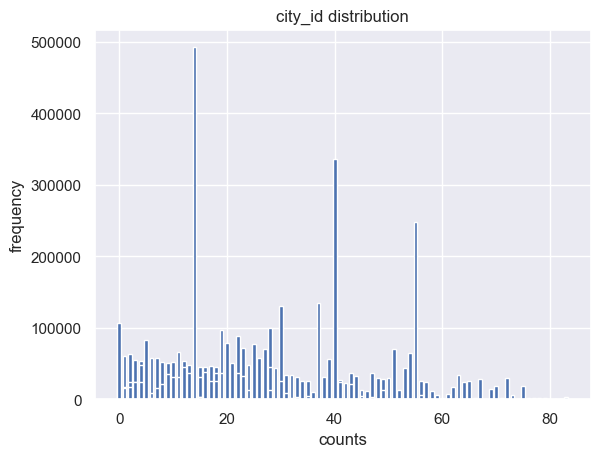

In [100]:
training_distribution = pd.DataFrame(train_groupby, columns=['date_block_num', 'shop_id', 'item_category_id', 'city_id'])
draw_distribution(training_distribution)

### Correlations

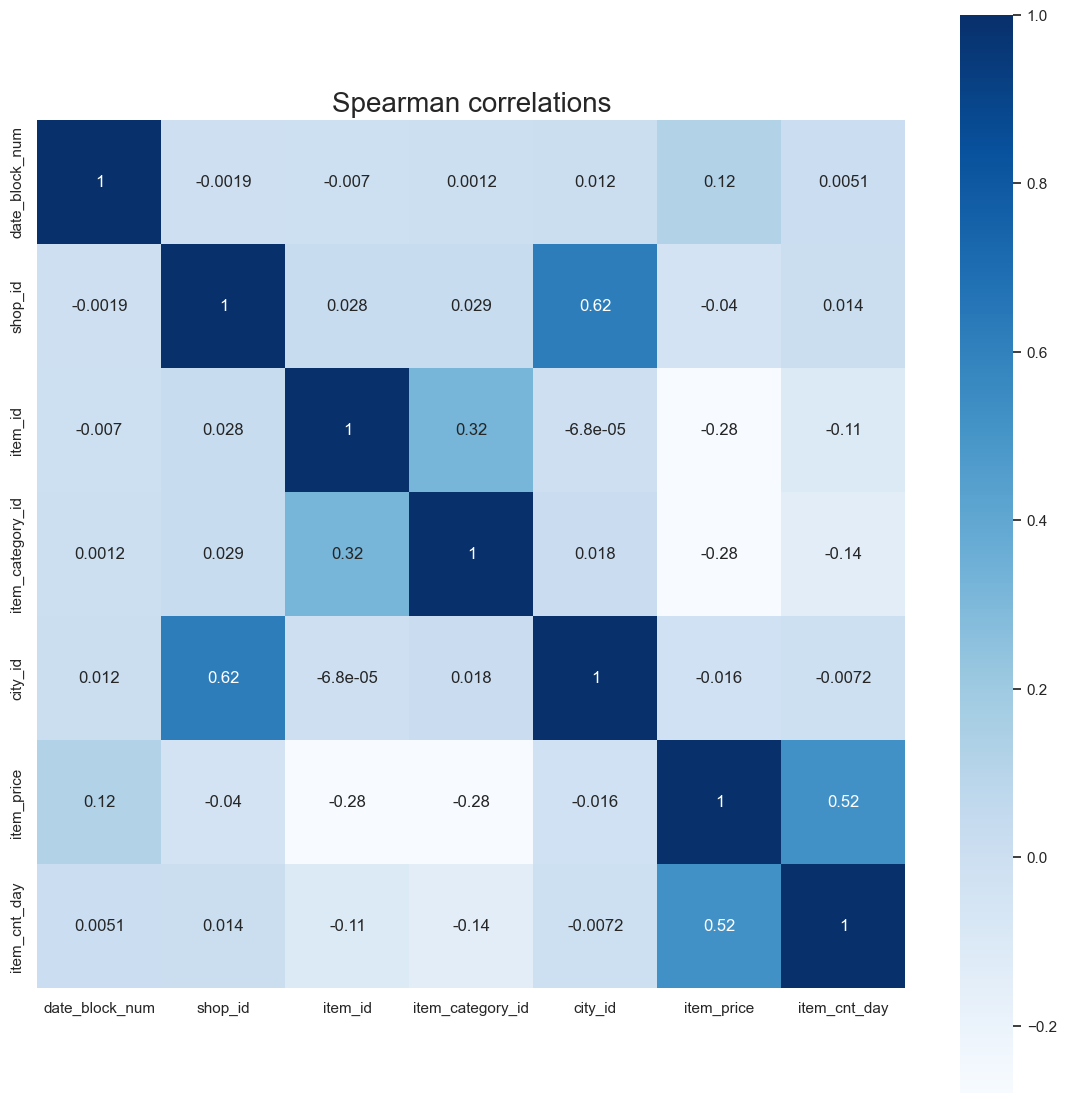

In [128]:
sales_corr_p = train_groupby.corr('spearman')
plt.subplots(figsize=(14,14),facecolor='w')
plt.title('Spearman correlations', fontsize = 20)
fig=sns.heatmap(sales_corr_p,annot=True, vmax=1, square=True, cmap="Blues", fmt='.2g')
plt.savefig('../fig/'+'spearman.jpg')

/Users/hexiang/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_py.py:5215: RuntimeWarning:

overflow encountered in long_scalars



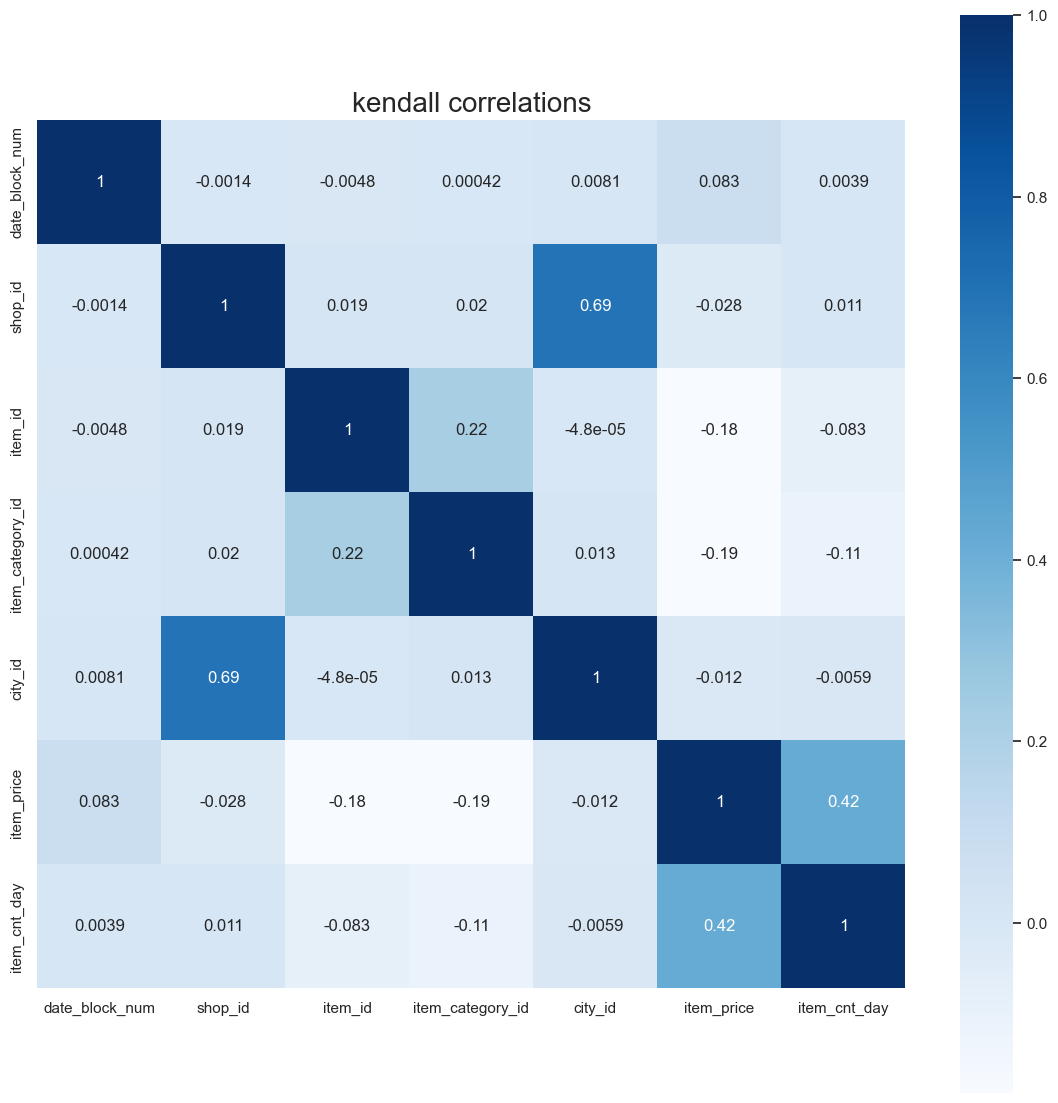

In [129]:
sales_corr_p = train_groupby.corr('kendall')
plt.subplots(figsize=(14,14),facecolor='w')
plt.title('kendall correlations', fontsize = 20)
fig=sns.heatmap(sales_corr_p,annot=True, vmax=1, square=True, cmap="Blues", fmt='.2g')
plt.savefig('../fig/'+'kendall.jpg')